In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, AvgPool2D, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import plot_model
import pydot
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [2]:
testing_path = 'D:\\Research database\\Fish Detection\\Validation\\' 
training_path = 'D:\\Research database\\Fish Detection\\Train\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (324,324),batch_size = 32,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (324,324),batch_size = 32,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 12604 images belonging to 6 classes.
Found 1191 images belonging to 6 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:
model = Sequential()
# 1st conv block
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2),input_shape=(324,324,3), padding='valid'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(AvgPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(3, 3), padding='same'))
model.add(Conv2D(256, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(3, 3), padding='same'))

# hidden layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(6, activation='softmax'))
# compiling the sequential model
model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 161, 161, 32)      896       
_________________________________________________________________
average_pooling2d_1 (Average (None, 81, 81, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)        

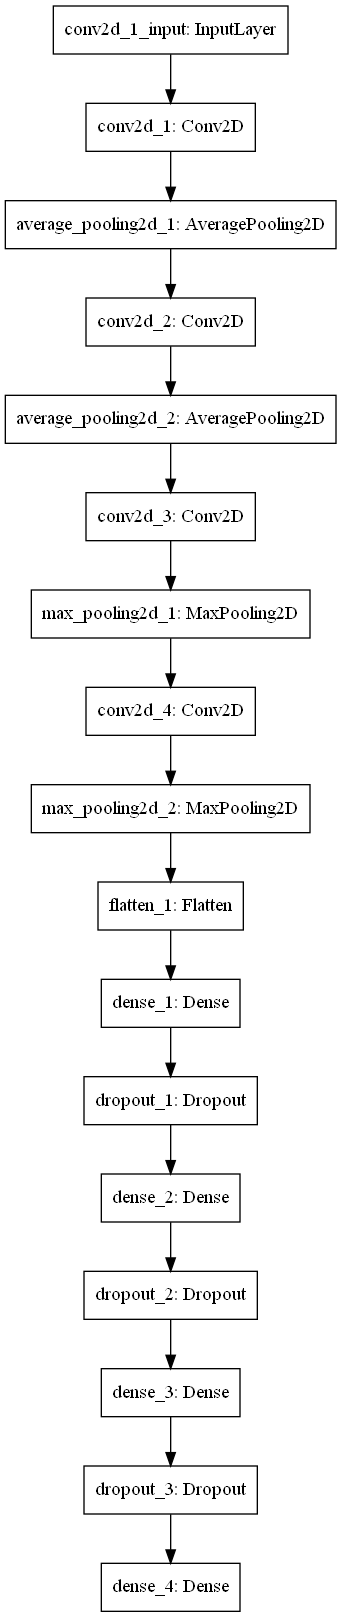

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='model_2.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 30,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/30
394/394 [==============================] - 43s 109ms/step - loss: 0.6987 - accuracy: 0.7143 - val_loss: 0.0014 - val_accuracy: 0.9631

Epoch 00001: val_accuracy improved from -inf to 0.96306, saving model to model_2.h5
Epoch 2/30
394/394 [==============================] - 41s 104ms/step - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0140 - val_accuracy: 0.9983

Epoch 00002: val_accuracy improved from 0.96306 to 0.99832, saving model to model_2.h5
Epoch 3/30
394/394 [==============================] - 41s 104ms/step - loss: 0.0104 - accuracy: 0.9961 - val_loss: 1.3232e-05 - val_accuracy: 1.0000

Epoch 00003: val_accuracy improved from 0.99832 to 1.00000, saving model to model_2.h5
Epoch 4/30
394/394 [==============================] - 42s 108ms/step - loss: 1.0519e-04 - accuracy: 1.0000 - val_loss: 5.1421e-05 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/30
394/394 [==============================] - 49s 124ms/step - loss: 4.0319e-05 - a

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


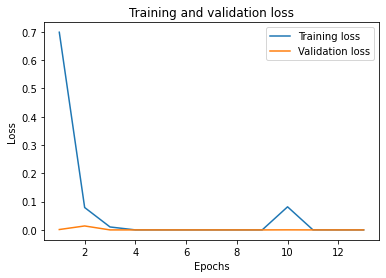

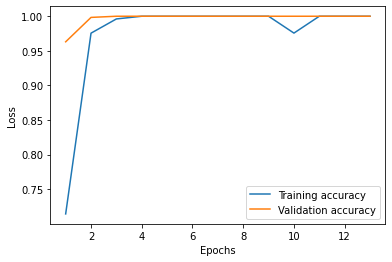

In [8]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_1_trainingVsvalidationLoss.jpeg")
plt.show()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.savefig("Model_2_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [9]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [10]:
his_df.to_excel('model_2_history.xlsx',index=False)